In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import scipy.stats as stats

import os

In [2]:
working_place = os.getcwd()
path_DAX = working_place + '/DAX.csv'
DAX = pd.read_csv(path_DAX)
DAX.shape

(252, 7)

In [3]:
path_CAC = working_place + '/CAC.csv'
CAC = pd.read_csv(path_CAC)
CAC.shape

(255, 7)

In [6]:
path_NAS = working_place + '/NASDAQ.csv'
NASDAQ = pd.read_csv(path_NAS)
NASDAQ.shape

(252, 7)

In [7]:
path_SPY = working_place + '/SPY.csv'
SPY = pd.read_csv(path_SPY)
SPY.shape

(252, 7)

In [8]:
new_sheet = pd.DataFrame()
new_sheet['Date'] = SPY['Date']
new_sheet['SPY'] = SPY['Open'].shift(-1) - SPY['Open']
new_sheet['SPYLag'] = SPY['Open'] - SPY['Open'].shift(1)
new_sheet['NASDAQ'] = NASDAQ['Open'] - NASDAQ['Open'].shift(1)
new_sheet['CAC'] = CAC['Open'] - CAC['Open'].shift(1)
new_sheet['DAX'] = DAX['Open'] - DAX['Open'].shift(1)
new_sheet['Price'] = SPY['Open']
new_sheet

,Date,SPY,SPYLag,NASDAQ,CAC,DAX,Price
0,2020-04-08,9.619996,NaN,NaN,NaN,NaN,267.959991
1,2020-04-09,-0.439972,9.619996,193.289551,114.939942,189.090821,277.579987
2,2020-04-13,3.839996,-0.439972,-41.319825,41.250000,243.319336,277.140015
3,2020-04-14,-3.410004,3.839996,225.520020,-41.679688,-55.779297,280.980011
4,2020-04-15,1.579987,-3.410004,2.750000,-109.490234,-257.930664,277.570007
...,...,...,...,...,...,...,...
247,2021-04-01,5.059997,3.059998,291.750000,68.189941,84.459961,398.399994
248,2021-04-05,2.300019,5.059997,180.580078,15.770020,71.649414,403.459991
249,2021-04-06,0.179992,2.300019,86.769531,49.540039,236.200196,405.760010
250,2021-04-07,1.989991,0.179992,-6.370117,40.479981,-68.739258,405.940002


In [9]:
new_sheet = new_sheet.fillna(method = 'ffill')
new_sheet = new_sheet.dropna() #Drop rows with NaN (First Row with NaN) 
new_sheet.isnull().sum() # check if there is any NaN values

Date      0
SPY       0
SPYLag    0
NASDAQ    0
CAC       0
DAX       0
Price     0
dtype: int64

In [10]:
new_sheet.to_csv('/Users/boxtim/Desktop/Python_Finance/NewSheet1.csv')

In [11]:
new_sheet.shape

(251, 7)

In [12]:
Train = new_sheet.iloc[0:125, :]
Train

,Date,SPY,SPYLag,NASDAQ,CAC,DAX,Price
1,2020-04-09,-0.439972,9.619996,193.289551,114.939942,189.090821,277.579987
2,2020-04-13,3.839996,-0.439972,-41.319825,41.250000,243.319336,277.140015
3,2020-04-14,-3.410004,3.839996,225.520020,-41.679688,-55.779297,280.980011
4,2020-04-15,1.579987,-3.410004,2.750000,-109.490234,-257.930664,277.570007
5,2020-04-16,6.230011,1.579987,123.150391,68.540039,187.089843,279.149994
...,...,...,...,...,...,...,...
121,2020-09-30,4.600006,-0.880005,-16.099609,26.729980,-63.020508,333.089996
122,2020-10-01,-5.989990,4.600006,199.089843,-39.680176,57.310547,337.690002
123,2020-10-02,4.359986,-5.989990,-209.459961,57.010254,-253.299805,331.700012
124,2020-10-05,3.850006,4.359986,86.580079,-80.770019,265.269532,336.059998


In [13]:
Test = new_sheet.iloc[125: , :]
Test

,Date,SPY,SPYLag,NASDAQ,CAC,DAX,Price
126,2020-10-07,4.730011,-1.790009,-42.850585,18.169922,42.320312,338.119995
127,2020-10-08,2.709992,4.730011,171.669921,6.690429,109.940430,342.850006
128,2020-10-09,4.029998,2.709992,44.250000,22.000000,58.809570,345.559998
129,2020-10-12,2.690003,4.029998,244.730469,14.919922,16.019531,349.589996
130,2020-10-13,-1.529999,2.690003,169.429688,27.060059,46.840821,352.279999
...,...,...,...,...,...,...,...
247,2021-04-01,5.059997,3.059998,291.750000,68.189941,84.459961,398.399994
248,2021-04-05,2.300019,5.059997,180.580078,15.770020,71.649414,403.459991
249,2021-04-06,0.179992,2.300019,86.769531,49.540039,236.200196,405.760010
250,2021-04-07,1.989991,0.179992,-6.370117,40.479981,-68.739258,405.940002


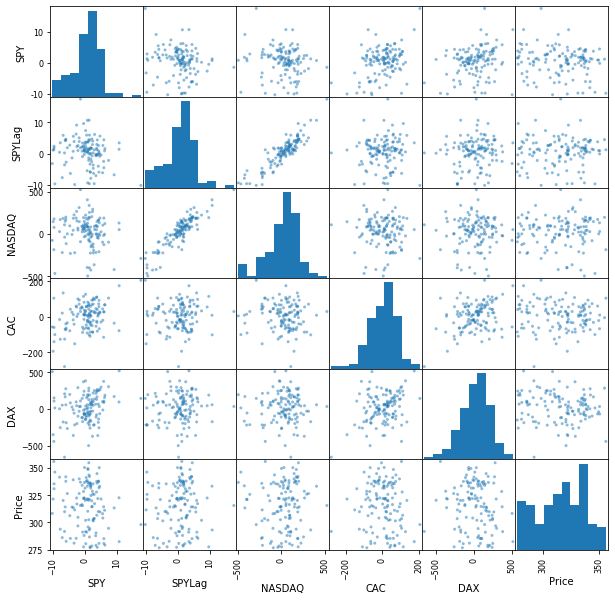

In [14]:
sm = scatter_matrix(Train, figsize = (10,10))

In [15]:
formula = 'SPY~SPYLag + NASDAQ + CAC +DAX'
lm = smf.ols(formula = formula, data= Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     8.114
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           7.96e-06
Time:                        08:49:13   Log-Likelihood:                -350.44
No. Observations:                 125   AIC:                             710.9
Df Residuals:                     120   BIC:                             725.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3711      0.371      1.000      0.319      -0.364       1.106
SPYLag        -0.4882      0.189     -2.578      0.011      -0.863      -0.113
NASDAQ         0.0089      0.005      1.809      0.073      -0.001       0.019
CAC            0.0231      0.005      4.335      0.000       0.013       0.034
DAX            0.0034      0.002      1.759      0.081      -0.000       0.007
==============================================================================
Omnibus:                        5.711   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.373
Skew:                          -0.393   Prob(JB):                       0.0681
Kurtosis:                       3.642   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
Train['PredictedY'] = lm.predict(Train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
Test['PredictedY'] = lm.predict(Test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
def adjustedMetric(data, model_k, yname):
    data['Y_predicted'] = model_k.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSE = ((data['Y_predicted'] - data[yname].mean())**2).sum()
    SSR = SST - SSE
    r2 = SSE / SST
    print('Enter Value for n')
    n = int(input())
    print('Enter Value for k')
    k = int(input())
    R2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    RMSE = (SSR / (n - k -1)) ** 0.5
    return R2_adj, RMSE

In [20]:
adjustedMetric(Train, lm, 'SPY')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Enter Value for n
125
Enter Value for k
4


(0.1866594212249828, 4.075630305354152)

In [21]:
adjustedMetric(Test, lm, 'SPY')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Enter Value for n
126
Enter Value for k
4


(0.2210708109988574, 3.1725005015892527)

In [22]:
#If the values for Train and Test are different dramatically, this is called overfitting

In [23]:
#Normally in an overfitting model. R2 and RMSE are much better in train 

In [24]:
# We can not apply this model to real world
#RMSE: the larger the number is, the worse it is
#### OUR Model is not overfitting

In [25]:
####Evaluating Model: Paper trading

In [27]:
Train['Order'] = [1 if sig > 0 else -1 for sig in Train['PredictedY']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
Train['Profit'] = Train['SPY'] * Train['Order']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
Train['Wealth'] = Train['Profit'].cumsum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
print('The total profit is', Train['Profit'].sum())

The total profit is 164.97982799999994


In [34]:
#####Sharp Ratio

In [39]:
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()
Train_daily_SR = dailyr.mean() / dailyr.std(ddof = 1)
Train_daily_SR

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.24305642427356478

In [40]:
#### MAX DRAWNDOWN

In [41]:
Train['Peak'] = Train['Wealth'].cummax()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
Train['Drawdown'] = (Train['Peak'] - Train['Wealth']) / Train['Peak']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
max_drawdown = Train['Drawdown'].max()